In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [1,2,3,4]
y = [3,5,6,8]
n = len(x)

In [3]:
s1 = 0
for i in range(n):
  s1 += x[i]*y[i]

In [4]:
s2= sum(x)

In [5]:
s3 = sum(y)

In [7]:
s4 = 0
for i in range(n):
  s4 += x[i]**2

In [8]:
s5 = 0
for i in range(n):
  s5 += x[i]
s5 = s5**2

In [11]:
alfa = (n*s1-s2*s3)/(n*s4-s5)

In [12]:
alfa

1.6

NameError: ignored

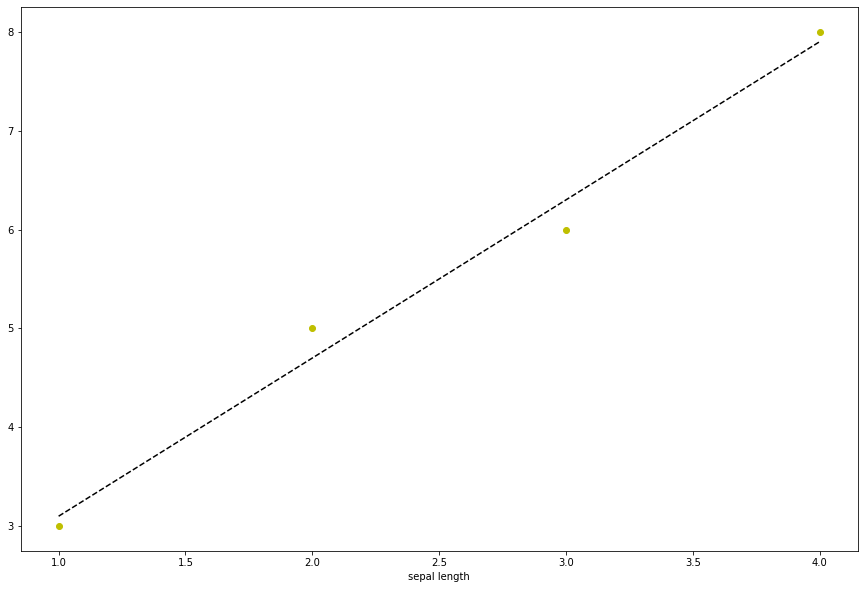

In [21]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(x,y,'yo', x, poly1d_fn(x), '--k')

plt.xlabel('Petal length')
plt.xlabel('sepal length')
#plt.figure(figsize=(20,10))
plt.show()

In [18]:
poly1d_fn

poly1d([1.6, 1.5])

In [25]:
(4*63 - 10*22) / ( 4*30 - 10**2 )

1.6

In [27]:
(10*63 - 22*30) / ( 10**2 - 4*30 )

1.5

In [28]:
1.6*20 + 1.5

33.5

In [36]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series


In [32]:
#!pip install sktime

In [38]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=30)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f898dc48d50>)

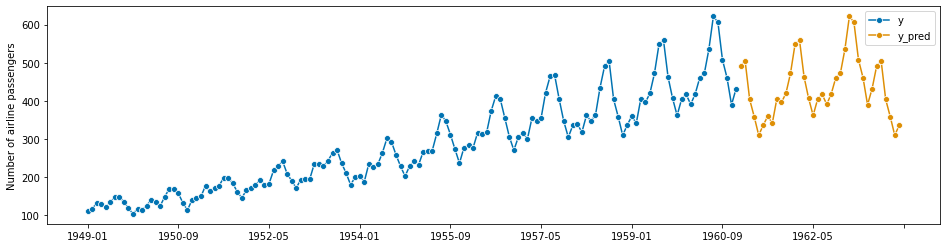

In [39]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

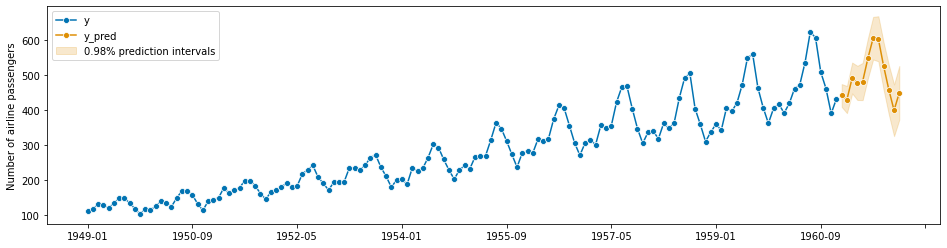

In [52]:
from sktime.utils import plotting
import numpy as np

from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster

# until fit, identical with the simple workflow
y = load_airline()

fh = np.arange(1, 13)

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y, fh=fh)
coverage = 0.98
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

# also requires predictions
y_pred = forecaster.predict()

fig, ax = plotting.plot_series(y, y_pred, labels=["y", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["Coverage"][coverage]["lower"],
    y_pred_ints["Coverage"][coverage]["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{coverage}% prediction intervals",
)
ax.legend();

In [53]:
# Python
import pandas as pd
from prophet import Prophet


In [54]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [55]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3tofhi43/5x2yl83l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3tofhi43/xhk7o0e8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98370', 'data', 'file=/tmp/tmp3tofhi43/5x2yl83l.json', 'init=/tmp/tmp3tofhi43/xhk7o0e8.json', 'output', 'file=/tmp/tmp3tofhi43/prophet_model1zc1ac5p/prophet_model-20221111191119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [57]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208452,7.480871,8.958773
3266,2017-01-16,8.533442,7.798693,9.308168
3267,2017-01-17,8.320853,7.626134,9.089152
3268,2017-01-18,8.153517,7.417309,8.962510
3269,2017-01-19,8.165423,7.448399,8.924489


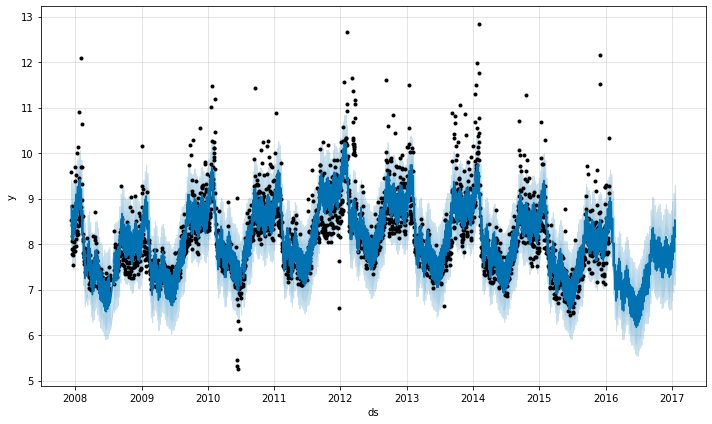

In [58]:
fig1 = m.plot(forecast)
